# Aufgabe 1 (5 Punkte)
Laden Sie den Datensatz 'rawdata_luftqualitaet.csv‘ . Er wurde im Forschungsprojekt ENVIRON erstellt und enthält
Messdaten aus Wohnzimmern in Bielefelder Wohnungen zur Luftfeuchtigkeit, zur Temperatur und zum CO2 – Gehalt der
Raumluft. Zusätzlich wurden die Temperatur des Heizkörpers und die Temperatur einer Außenwand von innen gemessen.
Die Daten wurden nach der Luftqualität bewertet im Attribut state_air_quality wobei 0-gute Qualität, 1-neutral empfundene
Qualität und 2- schlechte Luftqualität bedeuten. In dieser Aufgabe sollen die Messwerte als Eingangswerte für einen MLP-
Klassifikator dienen, um die Luftqualitätsbewertungen zu trainieren. Nutzen Sie die in der Vorlesung eingeführten
Bibliotheken numpy, pandas, seaborn, matplotlib und sklearn. Aus sklearn nutzen sie bitte die
Funktionen preprocessing, traintest_split aus sklearn.modelselection, MLPClassifier aus
sklearn.neural_network und accuracy_score aus sklearn.metrics.
### a)
Visualisieren Sie die Daten in geeigneter Weise als Datentabelle (erste Zeilen), Liniendiagramm (ggf. Ausschnitt wählen), Heatmap und Scattermatrix. Geben Sie auch Minimalwerte, Maximalwerte, Standardabweichung, Mittelwert und die Anzahl der Messwerte pro Spalte an. Analysieren Sie die Darstellungen und erklären Sie Ihre Beobachtungen. (1P)

   humidity_inside  temperature_inside  co2_inside  temperature_heater  \
0            58.94              21.955        1653              41.187   
1            58.97              21.940        1665              40.937   
2            57.89              22.353        1707              40.375   
3            58.96              22.504        1981              40.875   
4            57.74              22.515        1868              40.812   

   temperature_wall_inside  state_air_quality  
0                   14.062                  1  
1                   14.062                  1  
2                   14.250                  1  
3                   14.375                  1  
4                   14.375                  1  


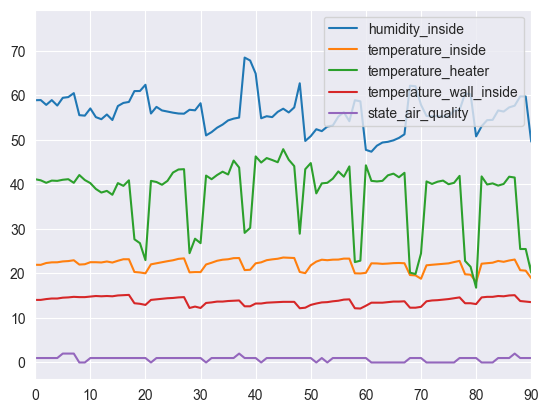

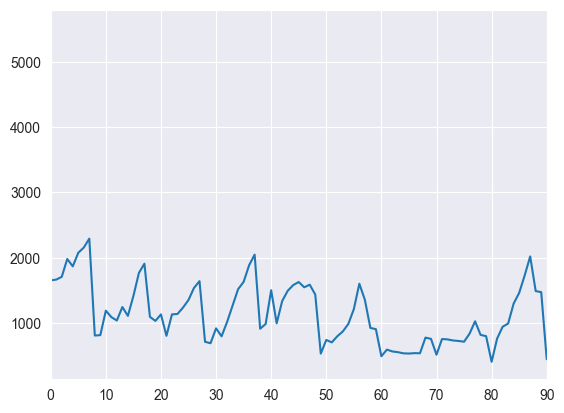

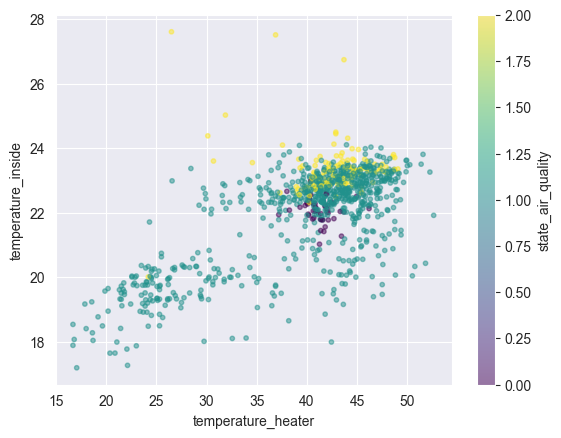

,humidity_inside,temperature_inside,co2_inside,temperature_heater,temperature_wall_inside,state_air_quality
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,51.598799,22.103834,1381.217249,40.034884,12.482422,1.085153
std,6.706102,1.457741,588.854522,7.383326,1.421408,0.422532
min,34.120000,17.194000,395.000000,16.687000,8.812000,0.000000
25%,46.967500,21.577750,978.000000,38.234250,11.500000,1.000000
50%,52.110000,22.589500,1328.500000,42.000000,12.437000,1.000000
75%,55.737500,23.089000,1716.000000,44.812000,13.625000,1.000000
max,75.510000,27.613000,5544.000000,52.625000,15.750000,2.000000


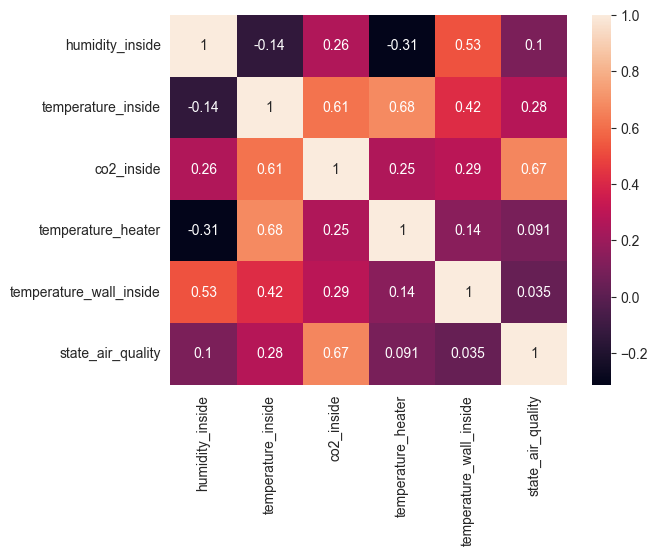

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import alpha

# Data table output
df = pd.read_csv("rawdata_luftqualitaet.csv")
print(df.head())

# Line chart
l_chart = df.drop(columns=["co2_inside"]).plot()
l_chart.set_xlim(0,90)
plt.show()
l_chart2 = df["co2_inside"].plot()
l_chart2.set_xlim(0,90)
plt.show()


# Scatter matrix
df.plot.scatter(x="temperature_heater", y="temperature_inside",c='state_air_quality',colormap='viridis',alpha=0.5, s = 10)
plt.show()

# Heatmap
sns.heatmap(df.corr(), annot=True)

# Information about min-values, max-values, standard deviation, average and number of values per column
# count = number of valid records
# std = Standardabweichung
# Percentages are quartiles (25% der Raumtemperatur unter 21.57 Grad bspw.)
df.describe()

#### Analyse
(Analysieren nur Scatter, Heatmap und die statistischen Kennzahlen grob nennen)

##### Scatterplot
- Bei einer Heiztemperatur von 36-44 Grad entsteht am häufigsten gute Luftqualität
- Im Bereich 39-49 haben wir teilweise schlechte Luftqualität
- Außerhalb der genannten Intervalle herrscht fast immer neutrale Luftqualität in den Wohnungen
- Je größer die Heiztemperatur, desto größer wird die Raumtemperatur

##### Heatmap
- Zwischen der Heizkörpertemperatur und der Raumtemperatur haben wir eine leicht starke Abhängigkeit von 0.68 (Je größer die Heiztemperatur, desto wärmer die Raumtemperatur)
- Der CO₂-Gehalt beeinflusst die Luftqualität auch leicht stark (Je größer der CO₂-Gehalt, desto schlechter wird die Luftqualität) (positive Korrelation)
- Die schwächste Korrelation / Abhängigkeit besteht zwischen der Außenwandtemperatur und Heizkörpertemperatur (Kaum Einfluss aufeinander)

### b)
Trennen Sie die Daten in zufälliger Auswahl in zwei disjunkte Datensätze, den Trainings- und den Testdatensatz im Verhältnis 80% zu 20%! (1P)

In [67]:
from sklearn.model_selection import train_test_split

# Split in two data sets
d_train, d_test = train_test_split(df, test_size = 0.2, random_state = 0)

# number of rows and columns of the datasets
print(d_train.shape)
print(d_test.shape)

(732, 6)
(184, 6)


### c)
 Normalisieren Sie die Messdaten auf Wertebereiche zwischen 0 und 1 und visualisieren Sie sie als Kontrolle in geeigneter Weise. (1P)

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalisation
# x - min / max - min
normalized_d_train = scaler.fit_transform(d_train)
normalized_d_test = scaler.transform(d_test)

# Output first two rows and all columns
print(normalized_d_train[:4,:])
print()
print(normalized_d_test[:4,:])

# Output shapes
print()
print(normalized_d_train.shape)
print(normalized_d_test.shape)

[[0.23749698 0.51646031 0.11070111 0.84172742 0.41288713 0.5       ]
 [0.48200048 0.24935215 0.22450961 0.75477211 0.22016733 0.5       ]
 [0.53805267 0.52116326 0.20703049 0.65217875 0.87156906 0.5       ]
 [0.20922928 0.49448124 0.10545737 0.77216317 0.55041832 0.5       ]]

[[0.52669727 0.4428448  0.07749077 0.66433858 0.74313812 0.        ]
 [0.28364339 0.51665227 0.16333269 0.8052201  0.44033465 0.5       ]
 [0.59362165 0.55427584 0.2429598  0.62435305 0.93571114 0.5       ]
 [0.34187002 0.49515309 0.2149932  0.68696088 0.34859827 0.5       ]]

(732, 6)
(184, 6)


## d)
Trainieren Sie einen MLP-Klassifikator mit dem Trainingsdatensatz und geben Sie die Prognose für die Bewertungen der Luftqualität als Ergebnis aus. Sie können gern mit den Hyperparametern experimentieren, um bessere oder schnellere Ergebnisse im Training zu erzielen. (1P)

In [71]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Preparation of the relevant train data
input_x = normalized_d_train[:, :5]
target_value_y = d_train["state_air_quality"]

# Preparation of the test data
input_x_test = normalized_d_test[:, :5]
target_value_y_test = d_test["state_air_quality"]

# Creating mlp classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,),max_iter=2000, random_state=42)

# Training the classifier with train data
mlp.fit(input_x,target_value_y)

# Testing the trained classier with test data
y_pred = mlp.predict(input_x_test)

print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1
 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 1 2 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 2 0 1 1 1 1 0 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]


## e)
 Evaluieren Sie das erzielte Ergebnis auf dem Testdatensatz, indem Sie die prognostizierte Bewertung mit der Originalbewertung vergleichen und die Genauigkeit der Klassifikation (accuracy_score) berechnen. (1P)

In [70]:
# Check, how well the trained classifier scores at test data
# Comparison real target values with y predictions
accuracy = accuracy_score(target_value_y_test,y_pred)

# Output accuracy
print("Accuracy: " + str(accuracy))

# Output accuracy in percent with 2 decimal places
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 0.9510869565217391
Accuracy: 95.11%
